In [1]:
#importing dependencies
import pandas as pd

In [7]:
#importing the data
# use forward slashes to avoid Python treating backslashes as escape sequences
onshore_wind = pd.read_csv("C:/Users/stian/OneDrive/Dokumenter/Fall2025/Energy/ninjaOnshoreWind.csv", delimiter=';')

In [14]:
onshore_wind

,time,NATIONAL,DK01,DK02,DK03,DK04,DK05
0,1980-01-01 00:00:00+00:00,0.100020,0.169258,0.154797,0.058525,0.082945,0.120442
1,1980-01-01 01:00:00+00:00,0.095627,0.157692,0.155743,0.059855,0.076598,0.112279
2,1980-01-01 02:00:00+00:00,0.090815,0.145822,0.156026,0.060255,0.070185,0.103703
3,1980-01-01 03:00:00+00:00,0.082520,0.134984,0.153629,0.058150,0.058770,0.092318
4,1980-01-01 04:00:00+00:00,0.071892,0.122622,0.150896,0.054550,0.042691,0.080078
...,...,...,...,...,...,...,...
394483,2024-12-31 19:00:00+00:00,0.868610,0.719071,0.813232,0.864892,0.896909,0.870305
394484,2024-12-31 20:00:00+00:00,0.872407,0.743165,0.838873,0.878592,0.893992,0.863677
394485,2024-12-31 21:00:00+00:00,0.874460,0.786826,0.860649,0.885570,0.891725,0.855458
394486,2024-12-31 22:00:00+00:00,0.878805,0.820947,0.872901,0.893129,0.894244,0.854166


In [11]:
onshore_wind.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 394488 entries, 0 to 394487
Data columns (total 7 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   time      394488 non-null  object 
 1   NATIONAL  394488 non-null  float64
 2   DK01      394488 non-null  float64
 3   DK02      394488 non-null  float64
 4   DK03      394488 non-null  float64
 5   DK04      394488 non-null  float64
 6   DK05      394488 non-null  float64
dtypes: float64(6), object(1)
memory usage: 21.1+ MB


In [12]:
#we want time as datetime object 
onshore_wind['time'] = pd.to_datetime(onshore_wind['time'])
onshore_wind.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 394488 entries, 0 to 394487
Data columns (total 7 columns):
 #   Column    Non-Null Count   Dtype              
---  ------    --------------   -----              
 0   time      394488 non-null  datetime64[ns, UTC]
 1   NATIONAL  394488 non-null  float64            
 2   DK01      394488 non-null  float64            
 3   DK02      394488 non-null  float64            
 4   DK03      394488 non-null  float64            
 5   DK04      394488 non-null  float64            
 6   DK05      394488 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(6)
memory usage: 21.1 MB


In [ ]:
meanCapFac = onshore_wind['NATIONAL'].mean()
maxCapFac = onshore_wind['NATIONAL'].max()
minCapFac = onshore_wind['NATIONAL'].min()

print(f'Mean capacity factor 1980-2024: {meanCapFac}')
print(f'Min Capacity factor: {minCapFac}, max capacity factor {maxCapFac}')

Mean capacity factor 1980-2024: 0.27523158493794486
Min Capacity factor: 0.000112, max capacity factor 0.966112


Grouping data by month and looking at aggregates: 


In [19]:
#df.groupby(df.your_date_column.dt.month)['values_column'].sum()
onshore_wind.groupby(onshore_wind.time.dt.month)['NATIONAL'].mean()

time
1     0.359883
2     0.334608
3     0.300794
4     0.232559
5     0.211363
6     0.209421
7     0.207049
8     0.216157
9     0.265391
10    0.312791
11    0.320933
12    0.334721
Name: NATIONAL, dtype: float64

01-01    0.364006
01-02    0.355769
01-03    0.394086
01-04    0.414688
01-05    0.313813
Name: NATIONAL, dtype: float64


<Axes: title={'center': 'Average capacity factor by calendar day (across years)'}>

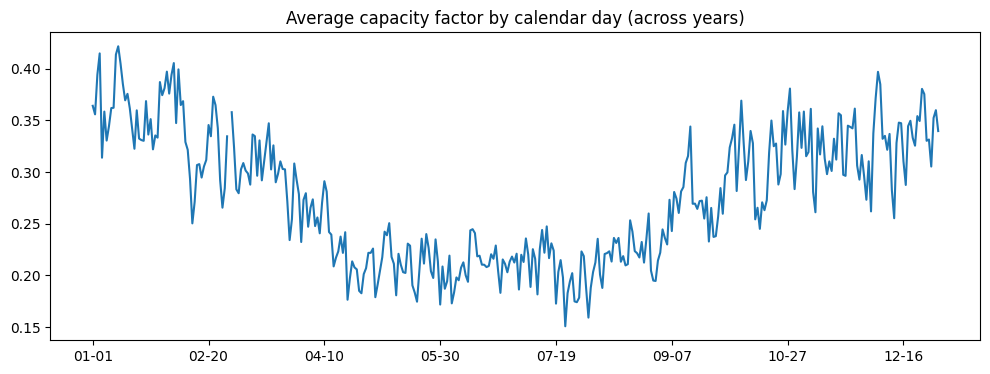

In [ ]:
# Group by month-day (averaging the same calendar day across years)
onshore_wind['month_day'] = onshore_wind['time'].dt.strftime('%m-%d')

# Option A: drop Feb 29 to keep a consistent 365-day calendar
onshore_wind = onshore_wind[onshore_wind['month_day'] != '02-29']

daily_avg = onshore_wind.groupby('month_day')['NATIONAL'].mean()

# Reindex to calendar order (ensures '01-01' ... '12-31')
calendar_order = pd.date_range('2000-01-01', '2000-12-31').strftime('%m-%d')
daily_avg = daily_avg.reindex(calendar_order)

print(daily_avg.head())   # first few days
# Optional: plot
daily_avg.plot(figsize=(12,4), title='Average capacity factor by calendar day (across years)')
